# Analysis of the Results from the Stationary Environment

In [1]:
from copy import deepcopy

from src.reinforcement_learning.experiments.detailed_experiment_runner import DetailedExperimentRunner
from src.visualization.experiments.detailed_experiment_visualizer import DetailedExperimentVisualizer

from experiments.plotting_variables import *
from experiments.pain_models import NORMAL_PAIN_PROBABILITIES, CHRONIC_PAIN_PROBABILITIES

experiment = ("non_stationary")
root_folder = "../"
create_plots_for_best_params = False
num_trials_for_plot_creation = 300
plot_save_directory = "analysis_plots"

In [2]:
normal_pain_model = NORMAL_PAIN_PROBABILITIES
chronic_pain_model = CHRONIC_PAIN_PROBABILITIES

def create_param_config_with_pandas_series_params(param_map, num_trials, pandas_series):
    param_map = deepcopy(param_map)
    agent_params = param_map["agent_params"]
    agent_params["w1"] = pandas_series["w1"]
    agent_params["w2"] = pandas_series["w2"]
    agent_params["w3"] = pandas_series["w3"]
    agent_params["w4"] = pandas_series["w4"]
    agent_params["aspiration_level"] = pandas_series["roh"]
    if "alpha" in pandas_series.index:
        agent_params["alpha"] = pandas_series["alpha"]
    if "epsilon" in pandas_series.index:
        agent_params["epsilon"] = pandas_series["epsilon"]

    if pandas_series["pain_model"] == "normal":
        agent_params["pain_model"] = normal_pain_model
    if pandas_series["pain_model"] == "chronic":
        agent_params["pain_model"] = chronic_pain_model

    param_map["experiment_params"]["num_experiments"] = num_trials
    param_map["agent_params"] = agent_params
    return param_map

In [3]:
import pandas as pd
import json

#Add config path
with open(root_folder + experiment + "/base_config.json") as file:
    base_config = json.load(file)

list_of_best_pandas_series = []

#Add results path
df = pd.read_csv(root_folder + experiment + "/results_" + experiment + ".csv")
df = df.rename(columns={"agent_params.w1": "w1",
                        "agent_params.w2": "w2",
                        "agent_params.w3": "w3",
                        "agent_params.w4": "w4",
                        "agent_params.pain_model": "pain_model",
                        "agent_params.aspiration_level": "roh",
                        "agent_params.alpha": "alpha",
                        "agent_params.epsilon": "epsilon",
                        "mean_result": "mean",
                        "std_result": "std"})
df = df.sort_values("mean", ascending=False)
print(df.shape)
df.head()

(312130, 11)


,alpha,roh,epsilon,pain_model,w1,w2,w3,w4,experiment_name,mean,std
34701,0.1,1.0,0.01,chronic,0.1,0.7,0.7,1.0,experiment_ce8a1eab-4faf-4319-9996-7d9e355d348e,4235.526667,180.308624
176074,0.1,0.7,0.01,chronic,0.0,0.3,0.3,0.5,experiment_9b5e6059-c270-4775-aaf8-4ae5005cc6db,4235.300000,170.030953
116519,0.3,0.7,0.01,chronic,0.0,0.3,0.9,0.7,experiment_ab873779-b5a3-4822-930c-5ff70789074e,4233.383333,171.510454
228891,0.1,0.9,0.01,chronic,0.0,0.5,0.5,0.7,experiment_a550bc07-8b29-4554-8e5a-78c0afeec5b3,4231.713333,169.688002
228916,0.1,0.9,0.01,chronic,0.0,0.7,0.1,0.9,experiment_7877f0bb-e353-4138-8370-0097d9f8660b,4231.176667,177.248721


In [4]:


def save_plots(pandas_series):
    param_map = create_param_config_with_pandas_series_params(base_config, num_trials_for_plot_creation, pandas_series)
    runner = DetailedExperimentRunner(param_map)
    results = runner.run_experiment()
    visualizer = DetailedExperimentVisualizer(param_map, results, root_folder + experiment + "/" + plot_save_directory + "/summaries")
    visualizer.save_results_plot()
    return visualizer

def get_experiment_visualizer(pandas_series):
    param_map = create_param_config_with_pandas_series_params(base_config, num_trials_for_plot_creation, pandas_series)
    runner = DetailedExperimentRunner(param_map)
    results = runner.run_experiment()
    return DetailedExperimentVisualizer(param_map, results, root_folder + experiment + "/" + plot_save_directory)



## Objective Only and Objective + Pain

In [5]:
df_obj = df[(df["w1"] > 0) &( df["w2"] == 0) & (df["w3"] == 0)]
df_obj_without_w4 = df_obj[df_obj["w4"] == 0]
df_obj_with_w4 = df_obj[df_obj["w4"] > 0]
print("Objective")
print(df_obj_without_w4.head())
print("\nObjective + Pain")
print(df_obj_with_w4.head())

Objective
       alpha  roh  epsilon pain_model   w1   w2   w3   w4  \
44684    0.9  0.0      0.1     normal  0.1  0.0  0.0  0.0   
44733    0.9  0.0      0.1     normal  0.3  0.0  0.0  0.0   
44880    0.9  0.0      0.1     normal  0.9  0.0  0.0  0.0   
44831    0.9  0.0      0.1     normal  0.7  0.0  0.0  0.0   
44929    0.9  0.0      0.1     normal  1.0  0.0  0.0  0.0   

                                       experiment_name         mean  \
44684  experiment_ab87cf1d-8b09-4ba2-82f2-2b67c6ba6329  1586.463333   
44733  experiment_7b28beed-4d5c-49b6-9b62-6adf36956749  1581.203333   
44880  experiment_86ca3f24-f0b5-4437-bf2b-9573355699fa  1580.203333   
44831  experiment_924f023e-26bc-4791-a7ff-e59cdab35d6a  1579.983333   
44929  experiment_97523ff0-aa12-41f7-afd0-61ebdf46677f  1577.063333   

              std  
44684  631.173056  
44733  623.261994  
44880  624.225912  
44831  630.912555  
44929  626.579251  

Objective + Pain
        alpha  roh  epsilon pain_model   w1   w2   w3   w4

In [6]:
best_obj_without_w4 = df_obj_without_w4.iloc[0]
best_obj_with_w4 = df_obj_with_w4.iloc[0]
print("Best Obj")
print(best_obj_without_w4)
list_of_best_pandas_series.append(best_obj_without_w4)

Best Obj
alpha                                                          0.9
roh                                                            0.0
epsilon                                                        0.1
pain_model                                                  normal
w1                                                             0.1
w2                                                             0.0
w3                                                             0.0
w4                                                             0.0
experiment_name    experiment_ab87cf1d-8b09-4ba2-82f2-2b67c6ba6329
mean                                                   1586.463333
std                                                     631.173056
Name: 44684, dtype: object


In [7]:
print("Best Obj + Pain")
print(best_obj_with_w4)
list_of_best_pandas_series.append(best_obj_with_w4)

Best Obj + Pain
alpha                                                          0.1
roh                                                            0.0
epsilon                                                       0.01
pain_model                                                 chronic
w1                                                             0.7
w2                                                             0.0
w3                                                             0.0
w4                                                             0.9
experiment_name    experiment_0697c54e-17fe-47e3-b50f-900b4b42f2b7
mean                                                   4142.463333
std                                                     177.205817
Name: 249302, dtype: object


In [8]:
if best_obj_with_w4["pain_model"] == "normal":
    other_pain_model = "chronic"
else:
    other_pain_model = "normal"

df_obj_with_w4_other = df_obj_with_w4[df_obj_with_w4["pain_model"] == other_pain_model]
best_obj_with_w4_other = df_obj_with_w4_other.iloc[0]
print("Best Obj + Pain (other)")
print(best_obj_with_w4_other)
list_of_best_pandas_series.append(best_obj_with_w4_other)

Best Obj + Pain (other)
alpha                                                          0.9
roh                                                            0.0
epsilon                                                       0.01
pain_model                                                  normal
w1                                                             0.1
w2                                                             0.0
w3                                                             0.0
w4                                                             1.0
experiment_name    experiment_60f4907a-b8c5-4853-86f9-05976859dcab
mean                                                   3101.823333
std                                                     271.823273
Name: 32553, dtype: object


## Expect Only and Expect + Pain

In [9]:
df_exp = df[(df["w1"] == 0) &( df["w2"] > 0) & (df["w3"] == 0)]
df_exp_without_w4 = df_exp[df_exp["w4"] == 0]
df_exp_with_w4 = df_exp[df_exp["w4"] > 0]
print("Expect")
print(df_exp_without_w4.head())
print("\nExpect + Pain")
print(df_exp_with_w4.head())

Expect
       alpha  roh  epsilon pain_model   w1   w2   w3   w4  \
71751    0.7  0.0     0.10     normal  0.0  1.0  0.0  0.0   
44677    0.9  0.0     0.10     normal  0.0  1.0  0.0  0.0   
44670    0.9  0.0     0.10     normal  0.0  0.9  0.0  0.0   
32540    0.9  0.0     0.01     normal  0.0  1.0  0.0  0.0   
44663    0.9  0.0     0.10     normal  0.0  0.7  0.0  0.0   

                                       experiment_name         mean  \
71751  experiment_8493ce8f-9ca1-4cf2-a8f3-5d38c344feb4  2371.020000   
44677  experiment_eaf691e0-4187-480f-bee3-0a4ced4d180d  2362.906667   
44670  experiment_a6383685-bd69-4535-acd6-530f77e32bfc  2335.956667   
32540  experiment_f413de03-6d24-4524-8c9d-bc5066d19c95  2258.340000   
44663  experiment_c4e397eb-6b41-408f-bb9b-fbf704c76d42  2257.106667   

              std  
71751  613.259006  
44677  646.763616  
44670  633.562287  
32540  768.085997  
44663  690.567433  

Expect + Pain
        alpha  roh  epsilon pain_model   w1   w2   w3   w4  \
28

In [10]:
best_exp_without_w4 = df_exp_without_w4.iloc[0]
best_exp_with_w4 = df_exp_with_w4.iloc[0]
print("Best Expect")
print(best_exp_without_w4)
list_of_best_pandas_series.append(best_exp_without_w4)

Best Expect
alpha                                                          0.7
roh                                                            0.0
epsilon                                                        0.1
pain_model                                                  normal
w1                                                             0.0
w2                                                             1.0
w3                                                             0.0
w4                                                             0.0
experiment_name    experiment_8493ce8f-9ca1-4cf2-a8f3-5d38c344feb4
mean                                                       2371.02
std                                                     613.259006
Name: 71751, dtype: object


In [11]:
print("Best Expect + Pain")
print(best_exp_with_w4)
list_of_best_pandas_series.append(best_exp_with_w4)

Best Expect + Pain
alpha                                                          0.3
roh                                                            0.0
epsilon                                                       0.01
pain_model                                                 chronic
w1                                                             0.0
w2                                                             0.3
w3                                                             0.0
w4                                                             0.3
experiment_name    experiment_6efb675e-9c86-4d97-81c0-00a51aa43b5d
mean                                                       4197.72
std                                                      186.90536
Name: 287569, dtype: object


In [12]:
if best_exp_with_w4["pain_model"] == "normal":
    other_pain_model = "chronic"
else:
    other_pain_model = "normal"

df_exp_with_w4_other = df_exp_with_w4[df_exp_with_w4["pain_model"] == other_pain_model]
best_exp_with_w4_other = df_exp_with_w4_other.iloc[0]
print("Best Expect + Pain (other)")
print(best_exp_with_w4_other)
list_of_best_pandas_series.append(best_exp_with_w4_other)

Best Expect + Pain (other)
alpha                                                          0.1
roh                                                            0.0
epsilon                                                       0.01
pain_model                                                  normal
w1                                                             0.0
w2                                                             0.1
w3                                                             0.0
w4                                                             0.9
experiment_name    experiment_82e09cb2-5ee8-4b85-b562-12fac6bae0c8
mean                                                   3896.303333
std                                                     383.082505
Name: 249436, dtype: object


## Compare Only and Compare + Pain

In [13]:
df_comp = df[(df["w1"] == 0) &( df["w2"] == 0) & (df["w3"] > 0)]
df_comp_without_w4 = df_comp[df_comp["w4"] == 0]
df_comp_with_w4 = df_comp[df_comp["w4"] > 0]
print("Compare Only")
print(df_comp_without_w4.head())
print("\nCompare + Pain")
print(df_comp_with_w4.head())

Compare Only
       alpha  roh  epsilon pain_model   w1   w2   w3   w4  \
50046    0.1  1.0     0.01     normal  0.0  0.0  0.1  0.0   
50060    0.1  1.0     0.01     normal  0.0  0.0  0.5  0.0   
50081    0.1  1.0     0.01     normal  0.0  0.0  1.0  0.0   
50074    0.1  1.0     0.01     normal  0.0  0.0  0.9  0.0   
50067    0.1  1.0     0.01     normal  0.0  0.0  0.7  0.0   

                                       experiment_name         mean  \
50046  experiment_e3c4327f-cf13-4674-96a9-ead166bc2e25  4171.130000   
50060  experiment_0c92547f-f970-4d9b-961c-6877e87365aa  4170.803333   
50081  experiment_69391998-a42b-423d-99de-eb0eb648539a  4170.803333   
50074  experiment_f1af4bb0-bedc-4044-9908-a608d99ba80b  4170.640000   
50067  experiment_5a937f87-6827-4558-b502-22d46b2b6b0d  4170.513333   

              std  
50046  178.902076  
50060  179.115771  
50081  179.115771  
50074  179.401207  
50067  179.163841  

Compare + Pain
        alpha  roh  epsilon pain_model   w1   w2   w3   w

In [14]:
best_comp_without_w4 = df_comp_without_w4.iloc[0]
best_comp_with_w4 = df_comp_with_w4.iloc[0]
print("Best Compare")
print(best_comp_without_w4)
list_of_best_pandas_series.append(best_comp_without_w4)

Best Compare
alpha                                                          0.1
roh                                                            1.0
epsilon                                                       0.01
pain_model                                                  normal
w1                                                             0.0
w2                                                             0.0
w3                                                             0.1
w4                                                             0.0
experiment_name    experiment_e3c4327f-cf13-4674-96a9-ead166bc2e25
mean                                                       4171.13
std                                                     178.902076
Name: 50046, dtype: object


In [15]:
print("Best Comp + Pain")
print(best_comp_with_w4)
list_of_best_pandas_series.append(best_comp_with_w4)

Best Comp + Pain
alpha                                                          0.3
roh                                                            0.9
epsilon                                                       0.01
pain_model                                                 chronic
w1                                                             0.0
w2                                                             0.0
w3                                                             0.9
w4                                                             0.1
experiment_name    experiment_ccafeeec-8e4b-4321-a083-ed6b4b527756
mean                                                   4178.106667
std                                                     181.553189
Name: 207718, dtype: object


In [16]:
if best_comp_with_w4["pain_model"] == "normal":
    other_pain_model = "chronic"
else:
    other_pain_model = "normal"

df_comp_with_w4_other = df_comp_with_w4[df_comp_with_w4["pain_model"] == other_pain_model]
best_comp_with_w4_other = df_comp_with_w4_other.iloc[0]
print("Best Comp + Pain (other)")
print(best_comp_with_w4_other)
list_of_best_pandas_series.append(best_comp_with_w4_other)

Best Comp + Pain (other)
alpha                                                          0.3
roh                                                            0.9
epsilon                                                       0.01
pain_model                                                  normal
w1                                                             0.0
w2                                                             0.0
w3                                                             0.9
w4                                                             1.0
experiment_name    experiment_9de78a28-b3d6-4f04-8b0e-a00b2764fecf
mean                                                       4173.07
std                                                     178.032085
Name: 139862, dtype: object


## Objective + Expect and Objective + Expect + Pain

In [17]:
df_obj_exp = df[(df["w1"] > 0) &( df["w2"] > 0) & (df["w3"] == 0)]
df_obj_exp_without_w4 = df_obj_exp[df_obj_exp["w4"] == 0]
df_obj_exp_with_w4 = df_obj_exp[df_obj_exp["w4"] > 0]
print("Objective + Expect")
print(df_obj_exp_without_w4.head())
print("\nObjective + Expect + Pain")
print(df_obj_exp_with_w4.head())

Objective + Expect
       alpha  roh  epsilon pain_model   w1   w2   w3   w4  \
71898    0.7  0.0      0.1     normal  0.5  1.0  0.0  0.0   
71996    0.7  0.0      0.1     normal  0.9  1.0  0.0  0.0   
71947    0.7  0.0      0.1     normal  0.7  1.0  0.0  0.0   
69545    0.7  0.0      0.1     normal  1.0  1.0  0.0  0.0   
71800    0.7  0.0      0.1     normal  0.1  1.0  0.0  0.0   

                                       experiment_name     mean         std  
71898  experiment_3145151d-db60-4470-8522-0aabe6c53854  2371.02  613.259006  
71996  experiment_d4af4a1d-6a89-4938-b2c0-8d5e6522b30f  2371.02  613.259006  
71947  experiment_269d6847-5568-4dd2-a2b9-bca307daf614  2371.02  613.259006  
69545  experiment_f6739cc6-fa8f-4e9c-b20d-4020b9cfdce4  2371.02  613.259006  
71800  experiment_dc178551-b9bc-4700-98bf-63b0c6e74bde  2371.02  613.259006  

Objective + Expect + Pain
        alpha  roh  epsilon pain_model   w1   w2   w3   w4  \
287612    0.3  0.0     0.01    chronic  0.1  0.3  0.0  0.

In [18]:
best_obj_exp_without_w4 = df_obj_exp_without_w4.iloc[0]
best_obj_exp_with_w4 = df_obj_exp_with_w4.iloc[0]
print("Best Obj and Expect")
print(best_obj_exp_without_w4)
list_of_best_pandas_series.append(best_obj_exp_without_w4)

Best Obj and Expect
alpha                                                          0.7
roh                                                            0.0
epsilon                                                        0.1
pain_model                                                  normal
w1                                                             0.5
w2                                                             1.0
w3                                                             0.0
w4                                                             0.0
experiment_name    experiment_3145151d-db60-4470-8522-0aabe6c53854
mean                                                       2371.02
std                                                     613.259006
Name: 71898, dtype: object


In [19]:
print("Best Obj and Expect + Pain")
print(best_obj_exp_with_w4)
list_of_best_pandas_series.append(best_obj_exp_with_w4)

Best Obj and Expect + Pain
alpha                                                          0.3
roh                                                            0.0
epsilon                                                       0.01
pain_model                                                 chronic
w1                                                             0.1
w2                                                             0.3
w3                                                             0.0
w4                                                             0.5
experiment_name    experiment_bb05f2d8-b3fd-42b5-b92d-e5b2261c9429
mean                                                       4214.61
std                                                     165.392362
Name: 287612, dtype: object


In [20]:
if best_obj_exp_with_w4["pain_model"] == "normal":
    other_pain_model = "chronic"
else:
    other_pain_model = "normal"

df_obj_exp_with_w4_other = df_obj_exp_with_w4[df_obj_exp_with_w4["pain_model"] == other_pain_model]
best_obj_exp_with_w4_other = df_obj_exp_with_w4_other.iloc[0]
print("Best Obj + Exp + Pain (other)")
print(best_obj_exp_with_w4_other)
list_of_best_pandas_series.append(best_obj_exp_with_w4_other)

Best Obj + Exp + Pain (other)
alpha                                                          0.7
roh                                                            0.0
epsilon                                                       0.01
pain_model                                                  normal
w1                                                             0.1
w2                                                             0.1
w3                                                             0.0
w4                                                             0.5
experiment_name    experiment_e5a0bab3-ef06-4d58-ac4d-cf7192bb4536
mean                                                   3813.976667
std                                                     446.580485
Name: 91131, dtype: object


## Objective + Compare and Objective + Compare + Pain

In [21]:
## Objective + Compare and Objective + Compare + Pain
df_obj_comp = df[(df["w1"] > 0) & (df["w2"] == 0) & (df["w3"] > 0)]
df_obj_comp_without_w4 = df_obj_comp[df_obj_comp["w4"] == 0]
df_obj_comp_with_w4 = df_obj_comp[df_obj_comp["w4"] > 0]
print("Objective + Compare")
print(df_obj_comp_without_w4.head())
print("\nObjective + Compare + Pain")
print(df_obj_comp_with_w4.head())

Objective + Compare
        alpha  roh  epsilon pain_model   w1   w2   w3   w4  \
117301    0.3  1.0     0.01     normal  0.1  0.0  1.0  0.0   
68227     0.5  1.0     0.01     normal  0.1  0.0  1.0  0.0   
66579     0.9  1.0     0.01     normal  0.1  0.0  1.0  0.0   
117294    0.3  1.0     0.01     normal  0.1  0.0  0.9  0.0   
68220     0.5  1.0     0.01     normal  0.1  0.0  0.9  0.0   

                                        experiment_name         mean  \
117301  experiment_8d342ff1-7e8b-4a09-bd65-653bb016bb99  4008.763333   
68227   experiment_6a246408-edd1-4c99-a78f-d2e5b2185aef  4000.453333   
66579   experiment_83feec9b-c3a0-4895-ae87-ef5bbad9f13c  3992.076667   
117294  experiment_1a8dad62-e9dc-44ac-a81d-2cfedf3ef978  3984.060000   
68220   experiment_bee9abc1-012e-417f-9465-4f07237d4071  3982.603333   

               std  
117301  189.100796  
68227   219.938699  
66579   233.515014  
117294  184.515790  
68220   198.686791  

Objective + Compare + Pain
        alpha  roh  

In [22]:
best_obj_comp_without_w4 = df_obj_comp_without_w4.iloc[0]
best_obj_comp_with_w4 = df_obj_comp_with_w4.iloc[0]
print("Best Obj and Comp")
print(best_obj_comp_without_w4)
list_of_best_pandas_series.append(best_obj_comp_without_w4)

Best Obj and Comp
alpha                                                          0.3
roh                                                            1.0
epsilon                                                       0.01
pain_model                                                  normal
w1                                                             0.1
w2                                                             0.0
w3                                                             1.0
w4                                                             0.0
experiment_name    experiment_8d342ff1-7e8b-4a09-bd65-653bb016bb99
mean                                                   4008.763333
std                                                     189.100796
Name: 117301, dtype: object


In [23]:
print("Best Obj and Comp + Pain")
print(best_obj_comp_with_w4)
list_of_best_pandas_series.append(best_obj_comp_with_w4)

Best Obj and Comp + Pain
alpha                                                          0.3
roh                                                            0.7
epsilon                                                       0.01
pain_model                                                 chronic
w1                                                             0.3
w2                                                             0.0
w3                                                             0.3
w4                                                             0.5
experiment_name    experiment_bba73adf-3781-40bf-a3da-8c5db841d4f8
mean                                                   4205.256667
std                                                     190.805591
Name: 116932, dtype: object


In [24]:
if best_obj_comp_with_w4["pain_model"] == "normal":
    other_pain_model = "chronic"
else:
    other_pain_model = "normal"

df_obj_comp_with_w4_other = df_obj_comp_with_w4[df_obj_comp_with_w4["pain_model"] == other_pain_model]
best_obj_comp_with_w4_other = df_obj_comp_with_w4_other.iloc[0]
print("Best Obj + Compare + Pain (other)")
print(best_obj_comp_with_w4_other)
list_of_best_pandas_series.append(best_obj_comp_with_w4_other)

Best Obj + Compare + Pain (other)
alpha                                                          0.3
roh                                                            1.0
epsilon                                                       0.01
pain_model                                                  normal
w1                                                             0.1
w2                                                             0.0
w3                                                             1.0
w4                                                             1.0
experiment_name    experiment_febb4ba2-fc28-4671-8cf3-7395394858e9
mean                                                       4165.89
std                                                     172.218976
Name: 117307, dtype: object


## Expect + Compare and Expect + Compare + Pain

In [25]:
df_exp_comp = df[(df["w1"] == 0) &( df["w2"] > 0) & (df["w3"] > 0)]
df_exp_comp_without_w4 = df_exp_comp[df_exp_comp["w4"] == 0]
df_exp_comp_with_w4 = df_exp_comp[df_exp_comp["w4"] > 0]
print("Expect + Compare")
print(df_exp_comp_without_w4.head())
print("\nExpect + Compare + Pain")
print(df_exp_comp_with_w4.head())

Expect + Compare
        alpha  roh  epsilon pain_model   w1   w2   w3   w4  \
117049    0.3  1.0     0.01     normal  0.0  0.1  1.0  0.0   
117042    0.3  1.0     0.01     normal  0.0  0.1  0.9  0.0   
117126    0.3  1.0     0.01     normal  0.0  0.5  0.9  0.0   
117077    0.3  1.0     0.01     normal  0.0  0.3  0.7  0.0   
117091    0.3  1.0     0.01     normal  0.0  0.3  1.0  0.0   

                                        experiment_name         mean  \
117049  experiment_37840dfa-d16a-413e-8298-c30e92b0c4bd  4194.233333   
117042  experiment_9a16e8ea-09ab-4447-9809-b53864a2fb8d  4191.760000   
117126  experiment_4d169faa-6231-43ba-8696-298eaf75c990  4188.506667   
117077  experiment_c642b8da-dc62-4f80-af37-c236ca1c7447  4185.380000   
117091  experiment_5f3a7ab1-19af-4c39-a992-fcad5a136889  4184.220000   

               std  
117049  188.782365  
117042  188.916703  
117126  207.610767  
117077  191.894277  
117091  189.832768  

Expect + Compare + Pain
        alpha  roh  epsilo

In [26]:
best_exp_comp_without_w4 = df_exp_comp_without_w4.iloc[0]
best_exp_comp_with_w4 = df_exp_comp_with_w4.iloc[0]
print("Best Expect and Comp")
print(best_exp_comp_without_w4)
list_of_best_pandas_series.append(best_exp_comp_without_w4)

Best Expect and Comp
alpha                                                          0.3
roh                                                            1.0
epsilon                                                       0.01
pain_model                                                  normal
w1                                                             0.0
w2                                                             0.1
w3                                                             1.0
w4                                                             0.0
experiment_name    experiment_37840dfa-d16a-413e-8298-c30e92b0c4bd
mean                                                   4194.233333
std                                                     188.782365
Name: 117049, dtype: object


In [27]:
print("Best Expect and Comp + Pain")
print(best_exp_comp_with_w4)
list_of_best_pandas_series.append(best_exp_comp_with_w4)

Best Expect and Comp + Pain
alpha                                                          0.1
roh                                                            0.7
epsilon                                                       0.01
pain_model                                                 chronic
w1                                                             0.0
w2                                                             0.3
w3                                                             0.3
w4                                                             0.5
experiment_name    experiment_9b5e6059-c270-4775-aaf8-4ae5005cc6db
mean                                                        4235.3
std                                                     170.030953
Name: 176074, dtype: object


In [28]:
if best_exp_comp_with_w4["pain_model"] == "normal":
    other_pain_model = "chronic"
else:
    other_pain_model = "normal"

df_exp_comp_with_w4_other = df_exp_comp_with_w4[df_exp_comp_with_w4["pain_model"] == other_pain_model]
best_exp_comp_with_w4_other = df_exp_comp_with_w4_other.iloc[0]
print("Best Expect + Compare + Pain (other)")
print(best_exp_comp_with_w4_other)
list_of_best_pandas_series.append(best_exp_comp_with_w4_other)

Best Expect + Compare + Pain (other)
alpha                                                          0.3
roh                                                            1.0
epsilon                                                       0.01
pain_model                                                  normal
w1                                                             0.0
w2                                                             0.1
w3                                                             1.0
w4                                                             0.9
experiment_name    experiment_1fe06f1b-e9e2-43bb-942e-b98fb5badbaa
mean                                                       4222.51
std                                                     175.951641
Name: 117054, dtype: object


## All and All + Pain

In [29]:
df_all = df[(df["w1"] > 0) &( df["w2"] > 0) & (df["w3"] > 0)]
df_all_without_w4 = df_all[df_all["w4"] == 0]
df_all_with_w4 = df_all[df_all["w4"] > 0]
print("All")
print(df_all_without_w4.head())
print("All + Pain")
print(df_all_with_w4.head())

All
        alpha  roh  epsilon pain_model   w1   w2   w3   w4  \
117427    0.3  1.0     0.01     normal  0.1  0.5  1.0  0.0   
117343    0.3  1.0     0.01     normal  0.1  0.1  1.0  0.0   
117385    0.3  1.0     0.01     normal  0.1  0.3  1.0  0.0   
157734    0.3  0.9     0.01     normal  0.1  0.3  0.9  0.0   
117371    0.3  1.0     0.01     normal  0.1  0.3  0.7  0.0   

                                        experiment_name         mean  \
117427  experiment_63f8fe29-f922-4768-9a6a-cb021a79e4dc  4194.556667   
117343  experiment_7bb2dbad-a906-4e82-bd62-eb8d2c3ab00f  4182.926667   
117385  experiment_dc50e2a9-1f16-4a43-8d8f-cf404da81788  4182.350000   
157734  experiment_32d6ceb7-5aa5-4426-aa8d-b91c2ccb6888  4181.196667   
117371  experiment_e1186390-e595-4a58-bd67-880852867213  4180.550000   

               std  
117427  201.175376  
117343  175.566511  
117385  192.164612  
157734  189.531454  
117371  185.582282  
All + Pain
       alpha  roh  epsilon pain_model   w1   w2   w3 

In [30]:
best_all_without_w4 = df_all_without_w4.iloc[0]
best_all_with_w4 = df_all_with_w4.iloc[0]
print("Best All")
print(best_all_without_w4)
list_of_best_pandas_series.append(best_all_without_w4)

Best All
alpha                                                          0.3
roh                                                            1.0
epsilon                                                       0.01
pain_model                                                  normal
w1                                                             0.1
w2                                                             0.5
w3                                                             1.0
w4                                                             0.0
experiment_name    experiment_63f8fe29-f922-4768-9a6a-cb021a79e4dc
mean                                                   4194.556667
std                                                     201.175376
Name: 117427, dtype: object


In [31]:
print("Best All + Pain")
print(best_all_with_w4)
list_of_best_pandas_series.append(best_all_with_w4)

Best All + Pain
alpha                                                          0.1
roh                                                            1.0
epsilon                                                       0.01
pain_model                                                 chronic
w1                                                             0.1
w2                                                             0.7
w3                                                             0.7
w4                                                             1.0
experiment_name    experiment_ce8a1eab-4faf-4319-9996-7d9e355d348e
mean                                                   4235.526667
std                                                     180.308624
Name: 34701, dtype: object


In [32]:
if best_all_with_w4["pain_model"] == "normal":
    other_pain_model = "chronic"
else:
    other_pain_model = "normal"

df_all_with_w4_other = df_all_with_w4[df_all_with_w4["pain_model"] == other_pain_model]
best_all_with_w4_other = df_all_with_w4_other.iloc[0]
print("Best All + Pain (other)")
print(best_all_with_w4_other)
list_of_best_pandas_series.append(best_all_with_w4_other)

Best All + Pain (other)
alpha                                                          0.3
roh                                                            1.0
epsilon                                                       0.01
pain_model                                                  normal
w1                                                             0.1
w2                                                             0.3
w3                                                             1.0
w4                                                             0.7
experiment_name    experiment_470af656-bb33-4ba2-ba89-3e16b374eb6b
mean                                                       4210.02
std                                                     184.400809
Name: 117389, dtype: object


In [33]:
if create_plots_for_best_params:
    for series in list_of_best_pandas_series:
        save_plots(series)

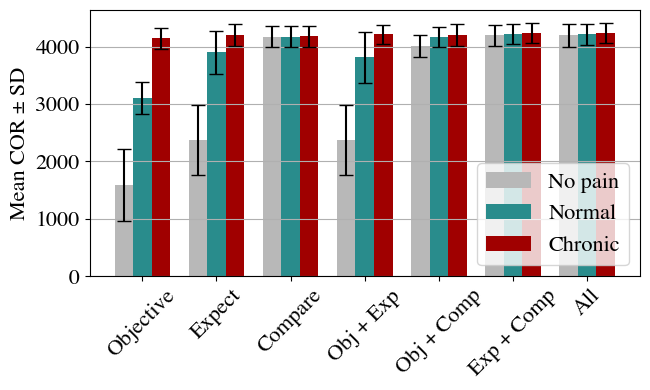

In [34]:
import os
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times'],
    'xtick.labelsize': axis_labels_font_size,  # Size of numbers on x-axis
    'ytick.labelsize': axis_labels_font_size   # Size of numbers on y-axis
})

# Prepare grouped data: {category: {pain_model: (mean, std, alpha, w4)}}
grouped_results = {}

for series in list_of_best_pandas_series:
    w1, w2, w3 = series["w1"], series["w2"], series["w3"]
    if w1 > 0 and w2 == 0 and w3 == 0:
        category = "Objective"
    elif w1 == 0 and w2 > 0 and w3 == 0:
        category = "Expect"
    elif w1 == 0 and w2 == 0 and w3 > 0:
        category = "Compare"
    elif w1 > 0 and w2 > 0 and w3 == 0:
        category = "Obj + Exp"
    elif w1 > 0 and w2 == 0 and w3 > 0:
        category = "Obj + Comp"
    elif w1 == 0 and w2 > 0 and w3 > 0:
        category = "Exp + Comp"
    elif w1 > 0 and w2 > 0 and w3 > 0:
        category = "All"
    else:
        continue

    if series["w4"] == 0:
        pain_model = "No pain"
    else:
        pain_model = series["pain_model"].capitalize()  # Normal or Chronic

    grouped_results.setdefault(category, {})[pain_model] = (
        series["mean"], series["std"], series["alpha"], series["w4"]
    )

# Plot settings
ordered_categories = ["Objective", "Expect", "Compare", "Obj + Exp", "Obj + Comp", "Exp + Comp", "All"]
pain_models = ["No pain", "Normal", "Chronic"]
colors = [no_pain_color, normal_pain_color, chronic_pain_color]

x = np.arange(len(ordered_categories))
width = 0.25

fig, ax = plt.subplots(figsize=(6.6, 4))

max_height = 0  # for fixed y position of labels

for i, (pain_model, color) in enumerate(zip(pain_models, colors)):
    means, stds = [], []

    for cat in ordered_categories:
        value = grouped_results.get(cat, {}).get(pain_model, (np.nan, np.nan, None, None))
        means.append(value[0])
        stds.append(value[1])
        if not np.isnan(value[0]) and value[0] + value[1] > max_height:
            max_height = value[0] + value[1]

    bars = ax.bar(x + i * width, means, width, label=pain_model, color=color, yerr=stds, capsize=5)

    # Add alpha and w4 inside bars at fixed position
    fixed_y = max_height * 0.4  # slightly above lower third

# Axis & Legend
ax.set_xticks(x + width)
ax.set_xticklabels(ordered_categories, rotation=45, fontsize=axis_labels_font_size)
ax.set_ylabel("Mean COR ± SD", fontsize=axis_labels_font_size)
#ax.set_title("Best performing agent from each reward category across pain conditions", fontsize=title_font_size)
ax.legend(fontsize=label_font_size, loc="lower right")
ax.grid(True, axis='y')


plt.tight_layout()

output_dir = root_folder + experiment + "/" + plot_save_directory

os.makedirs(output_dir, exist_ok=True)

path = output_dir + "/performance_plot_" + experiment + ".png"
plt.savefig(path, dpi=300, bbox_inches='tight')
plt.show()

In [35]:
df_best = pd.DataFrame(list_of_best_pandas_series).drop(columns=["experiment_name"])
df_best.loc[df_best["w4"] == 0, "pain_model"] = "no"
df_best.to_csv("best_performing_agents.csv", index=False)
print(df_best)

        alpha  roh  epsilon pain_model   w1   w2   w3   w4         mean  \
44684     0.9  0.0     0.10         no  0.1  0.0  0.0  0.0  1586.463333   
249302    0.1  0.0     0.01    chronic  0.7  0.0  0.0  0.9  4142.463333   
32553     0.9  0.0     0.01     normal  0.1  0.0  0.0  1.0  3101.823333   
71751     0.7  0.0     0.10         no  0.0  1.0  0.0  0.0  2371.020000   
287569    0.3  0.0     0.01    chronic  0.0  0.3  0.0  0.3  4197.720000   
249436    0.1  0.0     0.01     normal  0.0  0.1  0.0  0.9  3896.303333   
50046     0.1  1.0     0.01         no  0.0  0.0  0.1  0.0  4171.130000   
207718    0.3  0.9     0.01    chronic  0.0  0.0  0.9  0.1  4178.106667   
139862    0.3  0.9     0.01     normal  0.0  0.0  0.9  1.0  4173.070000   
71898     0.7  0.0     0.10         no  0.5  1.0  0.0  0.0  2371.020000   
287612    0.3  0.0     0.01    chronic  0.1  0.3  0.0  0.5  4214.610000   
91131     0.7  0.0     0.01     normal  0.1  0.1  0.0  0.5  3813.976667   
117301    0.3  1.0     0.

In [36]:
def generate_latex_table_row(df_table):
    pain_dict = {"no": "No pain", "normal": "Normal pain", "chronic": "Chronic pain"}
    for index, row in df_table.iterrows():
        cur_pain_model = pain_dict[row["pain_model"]]
        print(
            f"& {cur_pain_model} & "
            f"${row['w1']}$ & "
            f"${row['w2']}$ & "
            f"${row['w3']}$ & "
            f"${row['w4']}$ & "
            f"{f'${row["roh"]}$' if row['w3'] != 0 else '\\textsc{{NA}}'} & "
            f"${row['epsilon']}$ & "
            f"${row['alpha']}$ & "
            f"${round(row['mean'], 2)}$ & "
            f"${round(row['std'], 2)}$ \\\\"
        )


In [37]:
generate_latex_table_row(df_best)

& No pain & $0.1$ & $0.0$ & $0.0$ & $0.0$ & \textsc{{NA}} & $0.1$ & $0.9$ & $1586.46$ & $631.17$ \\
& Chronic pain & $0.7$ & $0.0$ & $0.0$ & $0.9$ & \textsc{{NA}} & $0.01$ & $0.1$ & $4142.46$ & $177.21$ \\
& Normal pain & $0.1$ & $0.0$ & $0.0$ & $1.0$ & \textsc{{NA}} & $0.01$ & $0.9$ & $3101.82$ & $271.82$ \\
& No pain & $0.0$ & $1.0$ & $0.0$ & $0.0$ & \textsc{{NA}} & $0.1$ & $0.7$ & $2371.02$ & $613.26$ \\
& Chronic pain & $0.0$ & $0.3$ & $0.0$ & $0.3$ & \textsc{{NA}} & $0.01$ & $0.3$ & $4197.72$ & $186.91$ \\
& Normal pain & $0.0$ & $0.1$ & $0.0$ & $0.9$ & \textsc{{NA}} & $0.01$ & $0.1$ & $3896.3$ & $383.08$ \\
& No pain & $0.0$ & $0.0$ & $0.1$ & $0.0$ & $1.0$ & $0.01$ & $0.1$ & $4171.13$ & $178.9$ \\
& Chronic pain & $0.0$ & $0.0$ & $0.9$ & $0.1$ & $0.9$ & $0.01$ & $0.3$ & $4178.11$ & $181.55$ \\
& Normal pain & $0.0$ & $0.0$ & $0.9$ & $1.0$ & $0.9$ & $0.01$ & $0.3$ & $4173.07$ & $178.03$ \\
& No pain & $0.5$ & $1.0$ & $0.0$ & $0.0$ & \textsc{{NA}} & $0.1$ & $0.7$ & $2371.02$ & $613

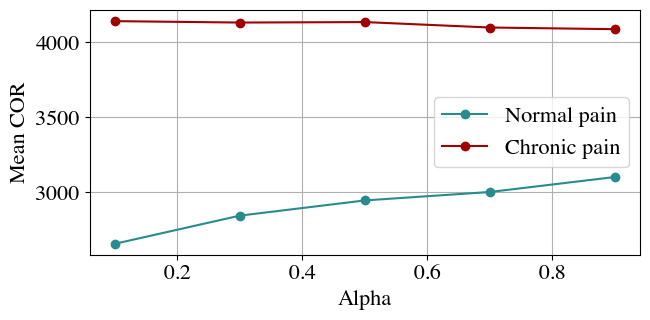

In [38]:
#fixed_for_alpha = df[(df["w1"] == 0.1) & (df["w2"] == 0.7) & (df["w3"] == 0) & (df["w4"] == 0.7) & (df["epsilon"] == 0.01)]

# Filter data
normal_df = df[(df["pain_model"] == "normal") & (df["w1"] == 0.1) & (df["w2"] == 0.0) & (df["w3"] == 0.0) & (df["w4"] == 1.0) & (df["epsilon"] == 0.01) & (df["roh"] == 0.00)].sort_values("alpha")
chronic_df = df[(df["pain_model"] == "chronic") & (df["w1"] == 0.7) & (df["w2"] == 0.0) & (df["w3"] == 0.0) & (df["w4"] == 0.9) & (df["epsilon"] == 0.01) & (df["roh"] == 0.00)].sort_values("alpha")

# Plot
fig, ax = plt.subplots(figsize=(6.6, 3.3))

ax.plot(normal_df["alpha"], normal_df["mean"], marker='o', label="Normal pain", color=normal_pain_color)
ax.plot(chronic_df["alpha"], chronic_df["mean"], marker='o', label="Chronic pain", color=chronic_pain_color)

ax.set_xlabel("Alpha", fontsize=axis_labels_font_size)
ax.set_ylabel("Mean COR", fontsize=axis_labels_font_size)
#ax.set_title("Effect of learning rate under normal and chronic pain", fontsize=title_font_size)
ax.grid(True)
ax.legend(fontsize=label_font_size, loc="center right")

# Extract metadata
n_row = normal_df.iloc[0]
c_row = chronic_df.iloc[0]

# Normal Pain info
n_info = (
    f"Normal pain → w1: {n_row['w1']}, w2: {n_row['w2']}, w3: {n_row['w3']}, w4: {n_row['w4']}, "
    f"epsilon: {n_row['epsilon']}"
)

# Chronic Pain info
c_info = (
    f"Chronic pain → w1: {c_row['w1']}, w2: {c_row['w2']}, w3: {c_row['w3']}, w4: {c_row['w4']}, "
    f"epsilon: {c_row['epsilon']}"
)

# Full caption text (multi-line)
full_caption = f"{n_info}\n{c_info}"

# Adjust layout to fit multi-line caption
fig.subplots_adjust(bottom=0.25)
#fig.text(0.5, 0.05, full_caption, ha='center', va='bottom', fontsize=caption_font_size, linespacing=1.5)
plt.tight_layout()
plt.savefig(root_folder + experiment + "/" + plot_save_directory + "/" + "alpha_vs_reward_non_stationary_obj.png", dpi=300)
plt.show()

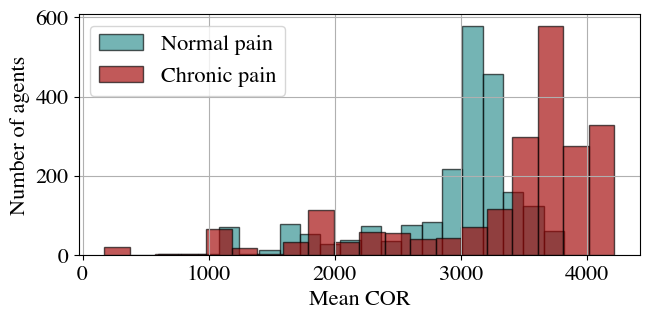

Mean reward (Normal Pain, Obj + Exp): 2907.96
Mean reward (Chronic Pain, Obj + Exp): 3323.22


In [39]:
# Filter: Normal pain agents with Objective + Expect + Pain (no Compare)
normal_objexp_pain = df[
    (df["pain_model"] == "normal") &
    (df["w1"] > 0) & (df["w2"] > 0) &
    (df["w3"] == 0) & (df["w4"] > 0)
]

# Filter: All chronic pain agents
chronic_all = df[
    (df["pain_model"] == "chronic") &
    (df["w1"] > 0) & (df["w2"] > 0) &
    (df["w3"] == 0) & (df["w4"] > 0)
]

# Extract cumulative objective rewards
normal_rewards = normal_objexp_pain["mean"]
chronic_rewards = chronic_all["mean"]

# Plot histogram
plt.figure(figsize=(6.6, 3.3))
bins = 20

plt.hist(normal_rewards, bins=bins, alpha=0.65, label="Normal pain", color=normal_pain_color, edgecolor='black')
plt.hist(chronic_rewards, bins=bins, alpha=0.65, label="Chronic pain", color=chronic_pain_color, edgecolor='black')

# Labels & Title
plt.xlabel("Mean COR", fontsize=axis_labels_font_size)
plt.ylabel("Number of agents", fontsize=axis_labels_font_size)
#plt.title("Reward distribution: normal pain vs chronic pain in Objective+Expect", fontsize=title_font_size)
plt.legend(fontsize=label_font_size)
plt.grid(True)

plt.tight_layout()
plt.savefig(root_folder + experiment + "/" + plot_save_directory + "/" + "reward_distribution_obj_exp_pain.png", dpi=300)
plt.show()

# Calculate mean of the means
normal_mean = normal_rewards.mean()
chronic_mean = chronic_rewards.mean()

print(f"Mean reward (Normal Pain, Obj + Exp): {normal_mean:.2f}")
print(f"Mean reward (Chronic Pain, Obj + Exp): {chronic_mean:.2f}")


In [40]:
#visualizer = get_experiment_visualizer(best_obj_with_w4_other)
#visualizer.plot_subjective_pain("chronic_obj2")

In [41]:
visualizer = get_experiment_visualizer(best_obj_exp_with_w4)
visualizer.save_selected_metrics_plot(["Objective reward", "Well-being", "Subjective pain", "Cum. well-being"], "metrics_cp_non_stationary.png", "Object+Expect, Chronic Pain")
visualizer = get_experiment_visualizer(best_obj_exp_with_w4_other)
visualizer.save_selected_metrics_plot(["Objective reward", "Well-being", "Subjective pain", "Cum. well-being"], "metrics_np_non_stationary.png", "Object+Expect, Normal Pain")

In [42]:
df_exp_higher_pain = df[(df["w1"] == 0) &( df["w2"] == 0.1) & (df["w3"] == 0) & (df["w4"] == 1) & (df["pain_model"] == "normal")]
print(df_exp_higher_pain)

        alpha  roh  epsilon pain_model   w1   w2   w3   w4  \
278863    0.3  0.0     0.01     normal  0.0  0.1  0.0  1.0   
249437    0.1  0.0     0.01     normal  0.0  0.1  0.0  1.0   
294789    0.5  0.0     0.01     normal  0.0  0.1  0.0  1.0   
91085     0.7  0.0     0.01     normal  0.0  0.1  0.0  1.0   
32511     0.9  0.0     0.01     normal  0.0  0.1  0.0  1.0   
237074    0.1  0.0     0.10     normal  0.0  0.1  0.0  1.0   
309926    0.5  0.0     0.10     normal  0.0  0.1  0.0  1.0   
71722     0.7  0.0     0.10     normal  0.0  0.1  0.0  1.0   
44648     0.9  0.0     0.10     normal  0.0  0.1  0.0  1.0   
297500    0.3  0.0     0.10     normal  0.0  0.1  0.0  1.0   

                                        experiment_name         mean  \
278863  experiment_bcb218de-fb77-456d-bd76-ac54f6b547c6  3804.373333   
249437  experiment_82a89a63-2389-47aa-8fe4-010b6be44bac  3774.243333   
294789  experiment_f0a8ef58-f0fd-48b4-87dd-37ebbc99a13a  3534.733333   
91085   experiment_70890920-f

In [43]:
d = {"alpha": 0.7, "roh": 0.0, "epsilon": 0.01, "pain_model": "normal", "w1": 0.0, "w2": 0.5, "w3": 0.0, "w4": 1.4}
ser = pd.Series(data=d, index=["alpha", "roh", "epsilon", "pain_model", "w1", "w2", "w3", "w4"])
print(ser)
visualizer = get_experiment_visualizer(ser)
visualizer.save_selected_metrics_plot(["Cum. well-being", "Well-being", "Subjective pain"], "2_normal_pain_expect.png", "Expect, Normal Pain")

alpha            0.7
roh              0.0
epsilon         0.01
pain_model    normal
w1               0.0
w2               0.5
w3               0.0
w4               1.4
dtype: object


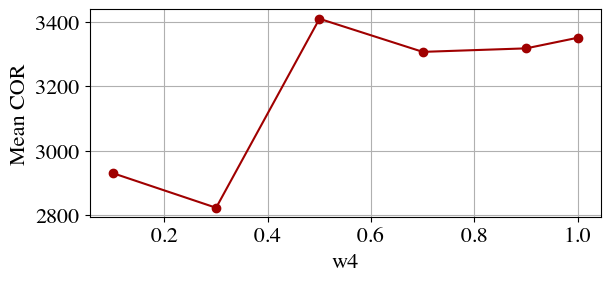

In [44]:


# Filter for one specific agent
agent_df = df[
    (df["pain_model"] == "normal") &
    (df["w1"] == 0.0) &
    (df["w2"] == 0.5) &
    (df["w3"] == 0.0) &
    (df["w4"] != 0.0) &
    (df["epsilon"] == 0.01) &
    (df["roh"] == 0.00) &
    (df["alpha"] == 0.7)
].sort_values("w4")  # Sort by w4

# Plot
fig, ax = plt.subplots(figsize=(6.6, 3.3))

ax.plot(agent_df["w4"], agent_df["mean"], marker='o', color=chronic_pain_color)

ax.set_xlabel("w4", fontsize=axis_labels_font_size)
ax.set_ylabel("Mean COR", fontsize=axis_labels_font_size)
#ax.set_title("Effect of w4 on performance (Expect, Chronic pain)", fontsize=title_font_size)
ax.grid(True)

# Extract metadata from first row
row = agent_df.iloc[0]
info = (
    ("Normal pain" if row['pain_model'] == "normal" else "Chronic pain") + ", "
    f"w1: {row['w1']}, w2: {row['w2']}, w3: {row['w3']}, "
    f"epsilon: {row['epsilon']}, "
    f"alpha: {row['alpha']}"
)


# Add caption below the plot
fig.subplots_adjust(bottom=0.25)
#fig.text(0.5, 0.05, info, ha='center', va='bottom', fontsize=caption_font_size, linespacing=1.5)

# Save plot
plt.savefig(
    root_folder + experiment + "/" + plot_save_directory + "/w4_vs_reward.png",
    dpi=300,
    bbox_inches='tight'
)
plt.show()
